## Calculation of a single particle that starts at the top of the layer and grows as it falls ##

The location $l_p$ of a particle changes according to the Stokes equation: 

$$ \frac{d l_p}{d t } = \frac{2}{9} \frac{\Delta \rho g r^2}{\mu} .$$

At time $t^j$ the particle has radius $r_j$. At the next time $t^{j+1}$ the new location is 

$$ l_p^{j+1} = l_j^i - \frac{2}{9} \frac{\Delta \rho g r_j^2}{\mu}\Delta t ,$$

where the minus sign indicates a downward velocity. To update the size of the particle I use the growth rate $G$ such that 

$$ r_{j+1} = r_j + G(T)\Delta t .$$

**But...** G should also decrease as we approach phase equilibrium. So for 5500 K and
4wt% O growth should stop at a volume fraction solid of 0.01. Do we do this by playing
with the chemical potential? Not sure... need to think further about this calculation!

In [1]:
import numpy as np
from scipy import optimize 
import matplotlib.pyplot as plt
%matplotlib inline

import params
import nucleation_and_growth as nandg
import feo_thermodynamics
import falling

Pr =  0.09075  Sc =  999.9999999999999


In [2]:
# Set equally spaced times
tp  = params.secinyr*np.linspace(1,100,10000)
dt  = tp[1] - tp[0]   

Tmax, Tmin = 5500, 4500
cmax, cmin = 0.01, 0.08

def interp(x0,y0,x1,y1,x):
    return y0 + (x-x0) * ( (y1-y0)/(x1-x0) )

# Start a small particle at the top of the F-layer
rp  = 1e-9*np.ones(len(tp))
lp  = params.rf  *np.ones(len(tp))
rpG = 1e-9*np.ones(len(tp))

print("{:10s}{:10s}{:10s}{:10s}{:10s}{:10s}{:10s}{:10s}"
      .format("t(yrs)", "T(K)", "O wtf", "lp(km)", "rp(m)", "rpG(m)", "Vs(m/s)", "Ve(m3)"))

ii = 1
for i in tp:
    Vs  = optimize.brentq(falling.fzhang_opt, -1.0, 100.0, 
                          args=(rp[ii-1], params.mu, params.g, params.drho, params.rhol))
    G   = nandg.sun_velocity_fit(200, 5500.0, params.cu_dhm, params.cu_k0)
    
    t   = interp(params.ri, Tmax, params.rf, Tmin, lp[ii-1])
    c   = interp(params.ri, cmax, params.rf, cmin, lp[ii-1])
        
    Ve = feo_thermodynamics.volume_fraction_solid(c, 330.0, t) * params.Vsl
    
    r3N =  3.0*Ve / (4.0*np.pi)
    dre = (3.0*Ve / (4.0*np.pi) / 1e30)**0.3333333
    drG =  G*dt
        
    if dre < drG:
        rp[ii] = dre
    else:
        rp[ii] = rp[ii-1] + G*dt
    
    lp[ii]  = lp[ii-1] - Vs*dt
    rpG[ii] = rpG[ii-1] + G*dt
    
    if lp[ii] < params.ri:
        break   
    
    print("{:8.2e}{:10.3e}{:10.3e}{:10.3e}{:10.3e}{:10.3e}{:10.3e}{:10.3e}"
          .format(tp[ii]/params.secinyr,t,c,lp[ii]/1e3,rp[ii], rpG[ii], Vs, Ve))
       
    ii = ii + 1

print("Particle has left the layer!")

t(yrs)    T(K)      O wtf     lp(km)    rp(m)     rpG(m)    Vs(m/s)   Ve(m3)    
1.01e+00 4.500e+03 8.000e-02 1.421e+03 9.690e-05 6.970e+05 2.497e-13 3.811e+18
1.02e+00 4.500e+03 8.000e-02 1.421e+03 9.690e-05 1.394e+06 3.736e-04 3.811e+18
1.03e+00 4.501e+03 7.996e-02 1.421e+03 9.690e-05 2.091e+06 3.736e-04 3.811e+18
1.04e+00 4.501e+03 7.992e-02 1.421e+03 9.690e-05 2.788e+06 3.736e-04 3.811e+18
1.05e+00 4.502e+03 7.988e-02 1.421e+03 9.690e-05 3.485e+06 3.736e-04 3.811e+18
1.06e+00 4.502e+03 7.984e-02 1.420e+03 9.690e-05 4.182e+06 3.736e-04 3.811e+18
1.07e+00 4.503e+03 7.980e-02 1.420e+03 9.690e-05 4.879e+06 3.736e-04 3.811e+18
1.08e+00 4.503e+03 7.976e-02 1.420e+03 9.690e-05 5.576e+06 3.736e-04 3.811e+18
1.09e+00 4.504e+03 7.971e-02 1.420e+03 9.690e-05 6.273e+06 3.736e-04 3.812e+18
1.10e+00 4.505e+03 7.967e-02 1.420e+03 9.690e-05 6.970e+06 3.736e-04 3.812e+18
1.11e+00 4.505e+03 7.963e-02 1.420e+03 9.691e-05 7.667e+06 3.736e-04 3.812e+18
1.12e+00 4.506e+03 7.959e-02 1.420e+03 9.691e-05 8

2.07e+00 4.562e+03 7.567e-02 1.409e+03 9.699e-05 7.527e+07 3.743e-04 3.822e+18
2.08e+00 4.562e+03 7.563e-02 1.408e+03 9.699e-05 7.597e+07 3.743e-04 3.822e+18
2.09e+00 4.563e+03 7.559e-02 1.408e+03 9.700e-05 7.667e+07 3.743e-04 3.822e+18
2.10e+00 4.564e+03 7.555e-02 1.408e+03 9.700e-05 7.736e+07 3.743e-04 3.823e+18
2.11e+00 4.564e+03 7.550e-02 1.408e+03 9.700e-05 7.806e+07 3.743e-04 3.823e+18
2.12e+00 4.565e+03 7.546e-02 1.408e+03 9.700e-05 7.876e+07 3.743e-04 3.823e+18
2.13e+00 4.565e+03 7.542e-02 1.408e+03 9.700e-05 7.945e+07 3.743e-04 3.823e+18
2.14e+00 4.566e+03 7.538e-02 1.408e+03 9.700e-05 8.015e+07 3.743e-04 3.823e+18
2.15e+00 4.567e+03 7.534e-02 1.408e+03 9.700e-05 8.085e+07 3.744e-04 3.823e+18
2.16e+00 4.567e+03 7.530e-02 1.407e+03 9.700e-05 8.155e+07 3.744e-04 3.823e+18
2.17e+00 4.568e+03 7.526e-02 1.407e+03 9.700e-05 8.224e+07 3.744e-04 3.823e+18
2.18e+00 4.568e+03 7.522e-02 1.407e+03 9.700e-05 8.294e+07 3.744e-04 3.823e+18
2.19e+00 4.569e+03 7.518e-02 1.407e+03 9.700e-05 8.3

3.15e+00 4.626e+03 7.121e-02 1.396e+03 9.710e-05 1.512e+08 3.751e-04 3.834e+18
3.16e+00 4.626e+03 7.116e-02 1.396e+03 9.710e-05 1.519e+08 3.751e-04 3.835e+18
3.17e+00 4.627e+03 7.112e-02 1.396e+03 9.710e-05 1.526e+08 3.751e-04 3.835e+18
3.18e+00 4.627e+03 7.108e-02 1.395e+03 9.710e-05 1.533e+08 3.751e-04 3.835e+18
3.19e+00 4.628e+03 7.104e-02 1.395e+03 9.710e-05 1.540e+08 3.751e-04 3.835e+18
3.20e+00 4.629e+03 7.100e-02 1.395e+03 9.710e-05 1.547e+08 3.751e-04 3.835e+18
3.21e+00 4.629e+03 7.096e-02 1.395e+03 9.710e-05 1.554e+08 3.751e-04 3.835e+18
3.22e+00 4.630e+03 7.092e-02 1.395e+03 9.710e-05 1.561e+08 3.751e-04 3.835e+18
3.23e+00 4.630e+03 7.088e-02 1.395e+03 9.710e-05 1.568e+08 3.751e-04 3.835e+18
3.24e+00 4.631e+03 7.084e-02 1.395e+03 9.711e-05 1.575e+08 3.751e-04 3.836e+18
3.25e+00 4.631e+03 7.080e-02 1.395e+03 9.711e-05 1.582e+08 3.751e-04 3.836e+18
3.26e+00 4.632e+03 7.075e-02 1.394e+03 9.711e-05 1.589e+08 3.752e-04 3.836e+18
3.27e+00 4.633e+03 7.071e-02 1.394e+03 9.711e-05 1.5

4.19e+00 4.687e+03 6.690e-02 1.383e+03 9.720e-05 2.244e+08 3.759e-04 3.847e+18
4.20e+00 4.688e+03 6.686e-02 1.383e+03 9.720e-05 2.251e+08 3.759e-04 3.847e+18
4.21e+00 4.688e+03 6.681e-02 1.383e+03 9.720e-05 2.258e+08 3.759e-04 3.847e+18
4.22e+00 4.689e+03 6.677e-02 1.383e+03 9.720e-05 2.265e+08 3.759e-04 3.847e+18
4.23e+00 4.690e+03 6.673e-02 1.383e+03 9.721e-05 2.272e+08 3.759e-04 3.847e+18
4.24e+00 4.690e+03 6.669e-02 1.383e+03 9.721e-05 2.279e+08 3.759e-04 3.847e+18
4.25e+00 4.691e+03 6.665e-02 1.383e+03 9.721e-05 2.286e+08 3.759e-04 3.848e+18
4.26e+00 4.691e+03 6.661e-02 1.383e+03 9.721e-05 2.293e+08 3.759e-04 3.848e+18
4.27e+00 4.692e+03 6.657e-02 1.383e+03 9.721e-05 2.300e+08 3.759e-04 3.848e+18
4.28e+00 4.692e+03 6.653e-02 1.382e+03 9.721e-05 2.307e+08 3.759e-04 3.848e+18
4.29e+00 4.693e+03 6.649e-02 1.382e+03 9.721e-05 2.314e+08 3.759e-04 3.848e+18
4.30e+00 4.694e+03 6.645e-02 1.382e+03 9.721e-05 2.321e+08 3.759e-04 3.848e+18
4.31e+00 4.694e+03 6.640e-02 1.382e+03 9.721e-05 2.3

5.28e+00 4.752e+03 6.237e-02 1.371e+03 9.732e-05 3.011e+08 3.767e-04 3.861e+18
5.29e+00 4.752e+03 6.233e-02 1.370e+03 9.732e-05 3.018e+08 3.767e-04 3.861e+18
5.30e+00 4.753e+03 6.229e-02 1.370e+03 9.732e-05 3.025e+08 3.767e-04 3.861e+18
5.31e+00 4.754e+03 6.225e-02 1.370e+03 9.732e-05 3.032e+08 3.768e-04 3.861e+18
5.32e+00 4.754e+03 6.221e-02 1.370e+03 9.732e-05 3.039e+08 3.768e-04 3.861e+18
5.33e+00 4.755e+03 6.217e-02 1.370e+03 9.732e-05 3.046e+08 3.768e-04 3.861e+18
5.34e+00 4.755e+03 6.213e-02 1.370e+03 9.732e-05 3.053e+08 3.768e-04 3.861e+18
5.35e+00 4.756e+03 6.209e-02 1.370e+03 9.732e-05 3.060e+08 3.768e-04 3.861e+18
5.36e+00 4.757e+03 6.204e-02 1.370e+03 9.733e-05 3.067e+08 3.768e-04 3.862e+18
5.37e+00 4.757e+03 6.200e-02 1.369e+03 9.733e-05 3.074e+08 3.768e-04 3.862e+18
5.38e+00 4.758e+03 6.196e-02 1.369e+03 9.733e-05 3.081e+08 3.768e-04 3.862e+18
5.39e+00 4.758e+03 6.192e-02 1.369e+03 9.733e-05 3.088e+08 3.768e-04 3.862e+18
5.40e+00 4.759e+03 6.188e-02 1.369e+03 9.733e-05 3.0

6.33e+00 4.814e+03 5.800e-02 1.358e+03 9.744e-05 3.750e+08 3.776e-04 3.875e+18
6.34e+00 4.815e+03 5.796e-02 1.358e+03 9.744e-05 3.757e+08 3.776e-04 3.875e+18
6.35e+00 4.815e+03 5.792e-02 1.358e+03 9.744e-05 3.764e+08 3.776e-04 3.875e+18
6.36e+00 4.816e+03 5.788e-02 1.358e+03 9.744e-05 3.771e+08 3.777e-04 3.875e+18
6.37e+00 4.817e+03 5.784e-02 1.358e+03 9.744e-05 3.778e+08 3.777e-04 3.875e+18
6.38e+00 4.817e+03 5.780e-02 1.357e+03 9.744e-05 3.785e+08 3.777e-04 3.875e+18
6.39e+00 4.818e+03 5.776e-02 1.357e+03 9.744e-05 3.791e+08 3.777e-04 3.876e+18
6.40e+00 4.818e+03 5.772e-02 1.357e+03 9.744e-05 3.798e+08 3.777e-04 3.876e+18
6.41e+00 4.819e+03 5.767e-02 1.357e+03 9.744e-05 3.805e+08 3.777e-04 3.876e+18
6.42e+00 4.820e+03 5.763e-02 1.357e+03 9.745e-05 3.812e+08 3.777e-04 3.876e+18
6.43e+00 4.820e+03 5.759e-02 1.357e+03 9.745e-05 3.819e+08 3.777e-04 3.876e+18
6.44e+00 4.821e+03 5.755e-02 1.357e+03 9.745e-05 3.826e+08 3.777e-04 3.876e+18
6.45e+00 4.821e+03 5.751e-02 1.357e+03 9.745e-05 3.8

7.38e+00 4.877e+03 5.362e-02 1.346e+03 9.756e-05 4.488e+08 3.786e-04 3.890e+18
7.39e+00 4.877e+03 5.358e-02 1.345e+03 9.756e-05 4.495e+08 3.786e-04 3.890e+18
7.40e+00 4.878e+03 5.354e-02 1.345e+03 9.756e-05 4.502e+08 3.786e-04 3.890e+18
7.41e+00 4.879e+03 5.350e-02 1.345e+03 9.757e-05 4.509e+08 3.786e-04 3.890e+18
7.42e+00 4.879e+03 5.346e-02 1.345e+03 9.757e-05 4.516e+08 3.786e-04 3.890e+18
7.43e+00 4.880e+03 5.342e-02 1.345e+03 9.757e-05 4.523e+08 3.786e-04 3.891e+18
7.44e+00 4.880e+03 5.338e-02 1.345e+03 9.757e-05 4.530e+08 3.786e-04 3.891e+18
7.45e+00 4.881e+03 5.333e-02 1.345e+03 9.757e-05 4.537e+08 3.787e-04 3.891e+18
7.46e+00 4.882e+03 5.329e-02 1.345e+03 9.757e-05 4.544e+08 3.787e-04 3.891e+18
7.47e+00 4.882e+03 5.325e-02 1.344e+03 9.757e-05 4.551e+08 3.787e-04 3.891e+18
7.48e+00 4.883e+03 5.321e-02 1.344e+03 9.757e-05 4.558e+08 3.787e-04 3.891e+18
7.49e+00 4.883e+03 5.317e-02 1.344e+03 9.758e-05 4.565e+08 3.787e-04 3.891e+18
7.50e+00 4.884e+03 5.313e-02 1.344e+03 9.758e-05 4.5

8.45e+00 4.941e+03 4.915e-02 1.333e+03 9.770e-05 5.241e+08 3.796e-04 3.907e+18
8.46e+00 4.941e+03 4.911e-02 1.333e+03 9.770e-05 5.248e+08 3.797e-04 3.907e+18
8.47e+00 4.942e+03 4.907e-02 1.333e+03 9.770e-05 5.255e+08 3.797e-04 3.907e+18
8.48e+00 4.942e+03 4.903e-02 1.332e+03 9.771e-05 5.262e+08 3.797e-04 3.907e+18
8.49e+00 4.943e+03 4.898e-02 1.332e+03 9.771e-05 5.269e+08 3.797e-04 3.907e+18
8.50e+00 4.944e+03 4.894e-02 1.332e+03 9.771e-05 5.276e+08 3.797e-04 3.907e+18
8.50e+00 4.944e+03 4.890e-02 1.332e+03 9.771e-05 5.283e+08 3.797e-04 3.908e+18
8.51e+00 4.945e+03 4.886e-02 1.332e+03 9.771e-05 5.290e+08 3.797e-04 3.908e+18
8.52e+00 4.945e+03 4.882e-02 1.332e+03 9.771e-05 5.297e+08 3.797e-04 3.908e+18
8.53e+00 4.946e+03 4.878e-02 1.332e+03 9.771e-05 5.304e+08 3.797e-04 3.908e+18
8.54e+00 4.947e+03 4.874e-02 1.332e+03 9.772e-05 5.311e+08 3.797e-04 3.908e+18
8.55e+00 4.947e+03 4.869e-02 1.331e+03 9.772e-05 5.318e+08 3.798e-04 3.908e+18
8.56e+00 4.948e+03 4.865e-02 1.331e+03 9.772e-05 5.3

9.51e+00 5.005e+03 4.466e-02 1.320e+03 9.786e-05 5.994e+08 3.808e-04 3.925e+18
9.52e+00 5.005e+03 4.462e-02 1.320e+03 9.786e-05 6.001e+08 3.808e-04 3.925e+18
9.53e+00 5.006e+03 4.458e-02 1.320e+03 9.786e-05 6.008e+08 3.808e-04 3.925e+18
9.54e+00 5.007e+03 4.454e-02 1.320e+03 9.786e-05 6.015e+08 3.808e-04 3.926e+18
9.55e+00 5.007e+03 4.450e-02 1.319e+03 9.786e-05 6.022e+08 3.808e-04 3.926e+18
9.56e+00 5.008e+03 4.445e-02 1.319e+03 9.786e-05 6.029e+08 3.809e-04 3.926e+18
9.57e+00 5.008e+03 4.441e-02 1.319e+03 9.786e-05 6.036e+08 3.809e-04 3.926e+18
9.58e+00 5.009e+03 4.437e-02 1.319e+03 9.787e-05 6.043e+08 3.809e-04 3.926e+18
9.59e+00 5.010e+03 4.433e-02 1.319e+03 9.787e-05 6.050e+08 3.809e-04 3.926e+18
9.60e+00 5.010e+03 4.429e-02 1.319e+03 9.787e-05 6.057e+08 3.809e-04 3.927e+18
9.61e+00 5.011e+03 4.425e-02 1.319e+03 9.787e-05 6.064e+08 3.809e-04 3.927e+18
9.62e+00 5.011e+03 4.420e-02 1.319e+03 9.787e-05 6.071e+08 3.809e-04 3.927e+18
9.63e+00 5.012e+03 4.416e-02 1.318e+03 9.787e-05 6.0

1.06e+01 5.071e+03 4.004e-02 1.307e+03 9.803e-05 6.768e+08 3.821e-04 3.946e+18
1.06e+01 5.072e+03 3.999e-02 1.307e+03 9.803e-05 6.775e+08 3.821e-04 3.946e+18
1.06e+01 5.072e+03 3.995e-02 1.306e+03 9.803e-05 6.781e+08 3.821e-04 3.946e+18
1.06e+01 5.073e+03 3.991e-02 1.306e+03 9.803e-05 6.788e+08 3.822e-04 3.947e+18
1.07e+01 5.073e+03 3.987e-02 1.306e+03 9.804e-05 6.795e+08 3.822e-04 3.947e+18
1.07e+01 5.074e+03 3.983e-02 1.306e+03 9.804e-05 6.802e+08 3.822e-04 3.947e+18
1.07e+01 5.075e+03 3.978e-02 1.306e+03 9.804e-05 6.809e+08 3.822e-04 3.947e+18
1.07e+01 5.075e+03 3.974e-02 1.306e+03 9.804e-05 6.816e+08 3.822e-04 3.947e+18
1.07e+01 5.076e+03 3.970e-02 1.306e+03 9.804e-05 6.823e+08 3.822e-04 3.948e+18
1.07e+01 5.076e+03 3.966e-02 1.306e+03 9.804e-05 6.830e+08 3.822e-04 3.948e+18
1.07e+01 5.077e+03 3.962e-02 1.306e+03 9.805e-05 6.837e+08 3.822e-04 3.948e+18
1.07e+01 5.077e+03 3.958e-02 1.305e+03 9.805e-05 6.844e+08 3.823e-04 3.948e+18
1.07e+01 5.078e+03 3.953e-02 1.305e+03 9.805e-05 6.8

1.17e+01 5.134e+03 3.564e-02 1.294e+03 9.821e-05 7.499e+08 3.835e-04 3.968e+18
1.17e+01 5.134e+03 3.560e-02 1.294e+03 9.821e-05 7.506e+08 3.835e-04 3.968e+18
1.17e+01 5.135e+03 3.556e-02 1.294e+03 9.822e-05 7.513e+08 3.835e-04 3.969e+18
1.17e+01 5.135e+03 3.552e-02 1.294e+03 9.822e-05 7.520e+08 3.836e-04 3.969e+18
1.17e+01 5.136e+03 3.548e-02 1.294e+03 9.822e-05 7.527e+08 3.836e-04 3.969e+18
1.17e+01 5.137e+03 3.543e-02 1.294e+03 9.822e-05 7.534e+08 3.836e-04 3.969e+18
1.17e+01 5.137e+03 3.539e-02 1.293e+03 9.822e-05 7.541e+08 3.836e-04 3.970e+18
1.17e+01 5.138e+03 3.535e-02 1.293e+03 9.823e-05 7.548e+08 3.836e-04 3.970e+18
1.17e+01 5.138e+03 3.531e-02 1.293e+03 9.823e-05 7.555e+08 3.836e-04 3.970e+18
1.17e+01 5.139e+03 3.527e-02 1.293e+03 9.823e-05 7.562e+08 3.836e-04 3.970e+18
1.18e+01 5.140e+03 3.522e-02 1.293e+03 9.823e-05 7.569e+08 3.837e-04 3.970e+18
1.18e+01 5.140e+03 3.518e-02 1.293e+03 9.823e-05 7.576e+08 3.837e-04 3.971e+18
1.18e+01 5.141e+03 3.514e-02 1.293e+03 9.824e-05 7.5

1.27e+01 5.195e+03 3.132e-02 1.282e+03 9.842e-05 8.217e+08 3.851e-04 3.993e+18
1.27e+01 5.196e+03 3.128e-02 1.282e+03 9.842e-05 8.224e+08 3.851e-04 3.993e+18
1.27e+01 5.197e+03 3.123e-02 1.282e+03 9.842e-05 8.231e+08 3.851e-04 3.993e+18
1.27e+01 5.197e+03 3.119e-02 1.281e+03 9.842e-05 8.238e+08 3.851e-04 3.994e+18
1.27e+01 5.198e+03 3.115e-02 1.281e+03 9.842e-05 8.245e+08 3.851e-04 3.994e+18
1.27e+01 5.198e+03 3.111e-02 1.281e+03 9.843e-05 8.252e+08 3.851e-04 3.994e+18
1.27e+01 5.199e+03 3.107e-02 1.281e+03 9.843e-05 8.259e+08 3.852e-04 3.994e+18
1.27e+01 5.200e+03 3.102e-02 1.281e+03 9.843e-05 8.266e+08 3.852e-04 3.995e+18
1.28e+01 5.200e+03 3.098e-02 1.281e+03 9.843e-05 8.273e+08 3.852e-04 3.995e+18
1.28e+01 5.201e+03 3.094e-02 1.281e+03 9.844e-05 8.280e+08 3.852e-04 3.995e+18
1.28e+01 5.201e+03 3.090e-02 1.281e+03 9.844e-05 8.287e+08 3.852e-04 3.995e+18
1.28e+01 5.202e+03 3.085e-02 1.280e+03 9.844e-05 8.294e+08 3.852e-04 3.996e+18
1.28e+01 5.203e+03 3.081e-02 1.280e+03 9.844e-05 8.3

1.38e+01 5.262e+03 2.668e-02 1.269e+03 9.867e-05 8.984e+08 3.870e-04 4.023e+18
1.38e+01 5.262e+03 2.664e-02 1.268e+03 9.867e-05 8.991e+08 3.870e-04 4.024e+18
1.38e+01 5.263e+03 2.659e-02 1.268e+03 9.867e-05 8.998e+08 3.870e-04 4.024e+18
1.38e+01 5.264e+03 2.655e-02 1.268e+03 9.867e-05 9.005e+08 3.870e-04 4.024e+18
1.38e+01 5.264e+03 2.651e-02 1.268e+03 9.868e-05 9.012e+08 3.870e-04 4.025e+18
1.38e+01 5.265e+03 2.647e-02 1.268e+03 9.868e-05 9.019e+08 3.871e-04 4.025e+18
1.38e+01 5.265e+03 2.642e-02 1.268e+03 9.868e-05 9.026e+08 3.871e-04 4.025e+18
1.38e+01 5.266e+03 2.638e-02 1.268e+03 9.868e-05 9.033e+08 3.871e-04 4.025e+18
1.38e+01 5.267e+03 2.634e-02 1.268e+03 9.869e-05 9.040e+08 3.871e-04 4.026e+18
1.39e+01 5.267e+03 2.630e-02 1.267e+03 9.869e-05 9.047e+08 3.871e-04 4.026e+18
1.39e+01 5.268e+03 2.625e-02 1.267e+03 9.869e-05 9.054e+08 3.872e-04 4.026e+18
1.39e+01 5.268e+03 2.621e-02 1.267e+03 9.869e-05 9.061e+08 3.872e-04 4.027e+18
1.39e+01 5.269e+03 2.617e-02 1.267e+03 9.870e-05 9.0

1.49e+01 5.328e+03 2.201e-02 1.255e+03 9.896e-05 9.751e+08 3.892e-04 4.059e+18
1.49e+01 5.329e+03 2.197e-02 1.255e+03 9.896e-05 9.758e+08 3.892e-04 4.060e+18
1.49e+01 5.330e+03 2.193e-02 1.255e+03 9.896e-05 9.764e+08 3.893e-04 4.060e+18
1.49e+01 5.330e+03 2.189e-02 1.255e+03 9.897e-05 9.771e+08 3.893e-04 4.060e+18
1.49e+01 5.331e+03 2.184e-02 1.255e+03 9.897e-05 9.778e+08 3.893e-04 4.061e+18
1.49e+01 5.331e+03 2.180e-02 1.255e+03 9.897e-05 9.785e+08 3.893e-04 4.061e+18
1.49e+01 5.332e+03 2.176e-02 1.254e+03 9.898e-05 9.792e+08 3.893e-04 4.061e+18
1.49e+01 5.333e+03 2.172e-02 1.254e+03 9.898e-05 9.799e+08 3.894e-04 4.062e+18
1.49e+01 5.333e+03 2.167e-02 1.254e+03 9.898e-05 9.806e+08 3.894e-04 4.062e+18
1.49e+01 5.334e+03 2.163e-02 1.254e+03 9.899e-05 9.813e+08 3.894e-04 4.063e+18
1.50e+01 5.334e+03 2.159e-02 1.254e+03 9.899e-05 9.820e+08 3.894e-04 4.063e+18
1.50e+01 5.335e+03 2.154e-02 1.254e+03 9.899e-05 9.827e+08 3.895e-04 4.063e+18
1.50e+01 5.336e+03 2.150e-02 1.254e+03 9.899e-05 9.8

1.59e+01 5.393e+03 1.749e-02 1.242e+03 9.930e-05 1.049e+09 3.918e-04 4.101e+18
1.59e+01 5.394e+03 1.745e-02 1.242e+03 9.930e-05 1.050e+09 3.918e-04 4.101e+18
1.59e+01 5.394e+03 1.740e-02 1.242e+03 9.930e-05 1.050e+09 3.919e-04 4.102e+18
1.59e+01 5.395e+03 1.736e-02 1.242e+03 9.931e-05 1.051e+09 3.919e-04 4.102e+18
1.59e+01 5.395e+03 1.732e-02 1.242e+03 9.931e-05 1.052e+09 3.919e-04 4.103e+18
1.60e+01 5.396e+03 1.728e-02 1.242e+03 9.931e-05 1.052e+09 3.919e-04 4.103e+18
1.60e+01 5.397e+03 1.723e-02 1.242e+03 9.932e-05 1.053e+09 3.920e-04 4.104e+18
1.60e+01 5.397e+03 1.719e-02 1.241e+03 9.932e-05 1.054e+09 3.920e-04 4.104e+18
1.60e+01 5.398e+03 1.715e-02 1.241e+03 9.932e-05 1.055e+09 3.920e-04 4.105e+18
1.60e+01 5.399e+03 1.710e-02 1.241e+03 9.933e-05 1.055e+09 3.920e-04 4.105e+18
1.60e+01 5.399e+03 1.706e-02 1.241e+03 9.933e-05 1.056e+09 3.921e-04 4.105e+18
1.60e+01 5.400e+03 1.702e-02 1.241e+03 9.934e-05 1.057e+09 3.921e-04 4.106e+18
1.60e+01 5.400e+03 1.698e-02 1.241e+03 9.934e-05 1.0

1.70e+01 5.461e+03 1.272e-02 1.229e+03 9.973e-05 1.126e+09 3.951e-04 4.155e+18
1.70e+01 5.462e+03 1.267e-02 1.229e+03 9.974e-05 1.127e+09 3.952e-04 4.156e+18
1.70e+01 5.462e+03 1.263e-02 1.228e+03 9.974e-05 1.128e+09 3.952e-04 4.156e+18
1.70e+01 5.463e+03 1.259e-02 1.228e+03 9.974e-05 1.128e+09 3.952e-04 4.157e+18
1.70e+01 5.464e+03 1.255e-02 1.228e+03 9.975e-05 1.129e+09 3.953e-04 4.157e+18
1.70e+01 5.464e+03 1.250e-02 1.228e+03 9.975e-05 1.130e+09 3.953e-04 4.158e+18
1.71e+01 5.465e+03 1.246e-02 1.228e+03 9.976e-05 1.130e+09 3.953e-04 4.158e+18
1.71e+01 5.465e+03 1.242e-02 1.228e+03 9.976e-05 1.131e+09 3.954e-04 4.159e+18
1.71e+01 5.466e+03 1.237e-02 1.228e+03 9.977e-05 1.132e+09 3.954e-04 4.159e+18
1.71e+01 5.467e+03 1.233e-02 1.228e+03 9.977e-05 1.133e+09 3.954e-04 4.160e+18
1.71e+01 5.467e+03 1.229e-02 1.227e+03 9.977e-05 1.133e+09 3.955e-04 4.161e+18
1.71e+01 5.468e+03 1.224e-02 1.227e+03 9.978e-05 1.134e+09 3.955e-04 4.161e+18
1.71e+01 5.469e+03 1.220e-02 1.227e+03 9.978e-05 1.1

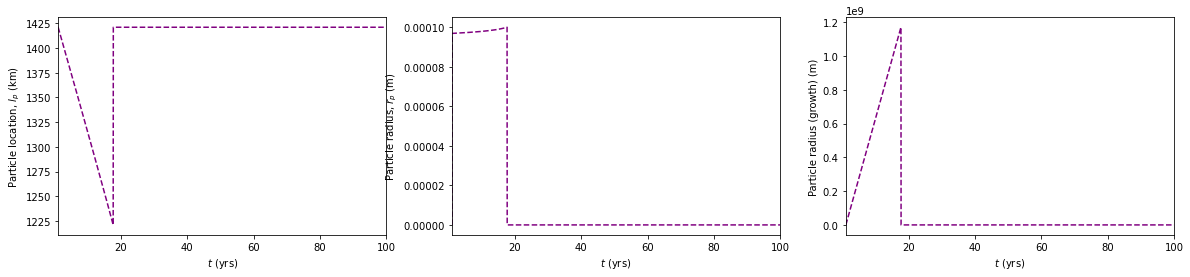

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,4))
ax1.set_xlabel("$t$ (yrs)")
ax1.set_ylabel("Particle location, $l_p$ (km)")
ax1.set_xlim([tp[0]/params.secinyr,tp[-1]/params.secinyr])
ax1.plot(tp/params.secinyr, lp/1e3, color="purple" , linestyle="--",label="")
#ax1.legend(loc=4)

ax2.set_xlabel("$t$ (yrs)")
ax2.set_ylabel("Particle radius, $r_p$ (m)")
ax2.set_xlim([tp[0]/params.secinyr,tp[-1]/params.secinyr])
ax2.plot(tp/params.secinyr, rp, color="purple" , linestyle="--",label="")
#ax2.legend(loc=4)

ax3.set_xlabel("$t$ (yrs)")
ax3.set_ylabel("Particle radius (growth) (m)")
ax3.set_xlim([tp[0]/params.secinyr,tp[-1]/params.secinyr])
ax3.plot(tp/params.secinyr, rpG, color="purple" , linestyle="--",label="")
#ax3.legend(loc=4)

#file2="tdep.pdf"
#plt.savefig(file2, format='pdf',bbox_inches="tight")
plt.show()